<a href="https://colab.research.google.com/github/NophaieViscente/PredictSalary/blob/main/PredictSalary_RegressionProblemExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predição de Salário - Problema de Regressão
* Este projeto tem por objetivo, efetuar uma predição dos salários para determinados empregos, com base em um conjunto de dados pré-definido.
* O projeto será totalmente executado dentro deste Notebook.

# Carregando as bibliotecas necessárias.

* A seguir será efetuado o carregamento das bibliotecas necessárias para uso no projeto.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Carregando os dados.

* A seguir é efetuado o carregamento dos dados para uso no projeto.

In [9]:
train = pd.read_csv(f'/content/drive/MyDrive/Train_rev1.csv')
test = pd.read_csv(f'/content/drive/MyDrive/Test_rev1.csv')
valid = pd.read_csv(f'/content/drive/MyDrive/Valid_rev1.csv')
location = pd.read_csv(f'/content/drive/MyDrive/Location_Tree.csv',header=None)

# AED (Análise Exploratória de Dados)
* Esta parte do projeto destina-se a análise exploratória de dados, parte importante de um projeto de DataScience. Através dessa primeira análise poderemos ter noções sobre o conjunto de dados que estamos trabalhando e possivelmente formular as primeiras hipóteses. 

### Validando as informações dos dataSets.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


* Observa-se que existem 244768 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

### Encontrando o item faltante no Cargo.
* Encontrar o indice do item faltante para validar se pode ser adicionado manualmente o cargo.

In [11]:
for indice,conteudo in train.Title.items():
    if type(conteudo) == float :
        print(indice)

1588


In [12]:
train.loc[1588]

Id                                                             48271669
Title                                                               NaN
FullDescription       Quality Improvement Manager North West England...
LocationRaw                                       Liverpool, Merseyside
LocationNormalized                                            Liverpool
ContractType                                                  full_time
ContractTime                                                        NaN
Company                                                             NaN
Category                                      Healthcare & Nursing Jobs
SalaryRaw                                     40,000 to 45,000 per year
SalaryNormalized                                                  42500
SourceName                                               careworx.co.uk
Name: 1588, dtype: object

* Verificado o item de indice 1588, onde o cargo é o 'Quality Improvement Manager'

* Adicionar dados ao indice 1588 

In [13]:
train.loc[[1588],'Title'] = 'Quality Improvement Manager'

* Validar dados adicionados.

In [14]:
train.info(), train.loc[1588]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244768 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


(None, Id                                                             48271669
 Title                                       Quality Improvement Manager
 FullDescription       Quality Improvement Manager North West England...
 LocationRaw                                       Liverpool, Merseyside
 LocationNormalized                                            Liverpool
 ContractType                                                  full_time
 ContractTime                                                        NaN
 Company                                                             NaN
 Category                                      Healthcare & Nursing Jobs
 SalaryRaw                                     40,000 to 45,000 per year
 SalaryNormalized                                                  42500
 SourceName                                               careworx.co.uk
 Name: 1588, dtype: object)

* Verifica-se que fora adicionado o dado.

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122463 entries, 0 to 122462
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  122463 non-null  int64 
 1   Title               122463 non-null  object
 2   FullDescription     122463 non-null  object
 3   LocationRaw         122463 non-null  object
 4   LocationNormalized  122463 non-null  object
 5   ContractType        33013 non-null   object
 6   ContractTime        90702 non-null   object
 7   Company             106202 non-null  object
 8   Category            122463 non-null  object
 9   SourceName          122463 non-null  object
dtypes: int64(1), object(9)
memory usage: 9.3+ MB


* Observa-se que existem 122463 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

In [16]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40663 entries, 0 to 40662
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  40663 non-null  int64 
 1   Title               40663 non-null  object
 2   FullDescription     40663 non-null  object
 3   LocationRaw         40663 non-null  object
 4   LocationNormalized  40663 non-null  object
 5   ContractType        10968 non-null  object
 6   ContractTime        30181 non-null  object
 7   Company             35312 non-null  object
 8   Category            40663 non-null  object
 9   SourceName          40663 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


* Observa-se que existem 40663 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

### Verificando duplicidade de dados nos DataSets.

In [17]:
train.Id.unique().size, test.Id.unique().size, valid.Id.unique().size

(244768, 122463, 40663)

* Pode-se verificar que o Id é único em todos os datasets.

### Verificando os dados.
* Usando um histograma para validar a distribuição dos dados do Salário Normalizado

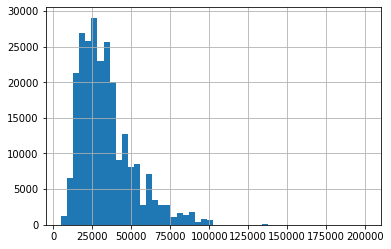

In [18]:
train.SalaryNormalized.hist(bins=50)

# Pré-Processamento de dados.
* Nessa fase iremos preparar os dados para a modelagem, com auxílio de algumas análises.

### Utilizando uma cópia do DataSet.
* Utilizando essa técnica para se caso ocorra um erro apenas recarreguemos o dataset inicial de treino, retornando desse ponto.

In [19]:
df_tmp = train.copy()

### Transformando os dados.
* Transformando os dados de cargos todos em caracteres minúsculos.

In [20]:
df_tmp.Title = df_tmp.Title.str.lower()